In [8]:
!unzip images_001.zip

Archive:  images_001.zip
   creating: images_001/
   creating: images_001/images/
 extracting: images_001/images/00000001_000.png  
 extracting: images_001/images/00000001_001.png  
 extracting: images_001/images/00000001_002.png  
 extracting: images_001/images/00000002_000.png  
 extracting: images_001/images/00000003_000.png  
 extracting: images_001/images/00000003_001.png  
 extracting: images_001/images/00000003_003.png  
 extracting: images_001/images/00000003_005.png  
 extracting: images_001/images/00000003_007.png  
 extracting: images_001/images/00000005_000.png  
 extracting: images_001/images/00000005_002.png  
 extracting: images_001/images/00000005_004.png  
 extracting: images_001/images/00000005_007.png  
 extracting: images_001/images/00000007_000.png  
 extracting: images_001/images/00000008_001.png  
  inflating: images_001/images/00000008_002.png  
 extracting: images_001/images/00000009_000.png  
 extracting: images_001/images/00000010_000.png  
 extracting: image

In [2]:
#upload api tolen
!pip install kaggle

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


!kaggle datasets download -d nih-chest-xrays/data #original 
!kaggle datasets download -d redwankarimsony/chestxray8-dataframe #includes bad labels

     |████████████████████████████████| 58 kB 966 kB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 78 kB 405 kB/s             
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=e6cc018aa6de5711fd6c36e6812325b3cdcb0d58fd47fe6c4cde49380a9bf672
  Stored in directory: /home/ec2-user/.cache/pip/wheels/77/47/e4/44a4ba1b7dfd53faaa35f59f1175e123b213ff401a8a56876b
Successfully built kaggle
100%|█████████████████████████████████████▉| 42.0G/42.0G [06:33<00:00, 63.0MB/s]
100%|███████████████████████████████████████| 42.0G/42.0G [06:33<00:00, 115MB/s]
 84%|████████████████████████████████▋      | 43.0M/51.3M [00:00<00:00, 102MB/s]
100%|███████████████████████████████████████| 51.3M/51.3M [00:00<00:00, 107MB/s]


In [3]:
!unzip chestxray8-dataframe.zip

Archive:  chestxray8-dataframe.zip
  inflating: cxr14_bad_labels.csv    
  inflating: densenet.hdf5           
  inflating: pretrained_model.h5     
  inflating: train_df.csv            


In [ ]:
!unzip data.zip

Archive:  data.zip
  inflating: ARXIV_V5_CHESTXRAY.pdf  
  inflating: BBox_List_2017.csv      
  inflating: Data_Entry_2017.csv     
  inflating: FAQ_CHESTXRAY.pdf       
  inflating: LOG_CHESTXRAY.pdf       
  inflating: README_CHESTXRAY.pdf    
  inflating: images_001/images/00000001_000.png  
  inflating: images_001/images/00000001_001.png  
  inflating: images_001/images/00000001_002.png  
  inflating: images_001/images/00000002_000.png  
  inflating: images_001/images/00000003_000.png  
  inflating: images_001/images/00000003_001.png  
  inflating: images_001/images/00000003_002.png  
  inflating: images_001/images/00000003_003.png  
  inflating: images_001/images/00000003_004.png  
  inflating: images_001/images/00000003_005.png  
  inflating: images_001/images/00000003_006.png  
  inflating: images_001/images/00000003_007.png  
  inflating: images_001/images/00000004_000.png  
  inflating: images_001/images/00000005_000.png  
  inflating: images_001/images/00000005_001.png  
  i

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from os.path import join, isfile, isdir
from glob import glob

from keras.utils import np_utils
from PIL import Image
sns.set()
from tqdm import tqdm

%matplotlib inline

# Step 1

In this part, we gaonna do some pre-work for our model trainning, including loading data, EDA and integration.

## 1.1 Loading Labels 
Using pandas to load CSV file, and see what the dataframe looks like. Display the first 10 rows of the dataframe in the cell below.



In [11]:
#original labels
all_labels= pd.read_csv('Data_Entry_2017_v2020.csv')
all_labels.head(10)

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   
5  00000003_002.png                  Hernia            1           3   
6  00000003_003.png     Hernia|Infiltration            2           3   
7  00000003_004.png                  Hernia            3           3   
8  00000003_005.png                  Hernia            4           3   
9  00000003_006.png                  Hernia            5           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           57              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           80              M            PA                 2500     2048   
4           74              F            PA                 2500     2048   
5           75              F            PA                 2048     2500   
6           76              F            PA                 2698     2991   
7           77              F            PA                 2500     2048   
8           78              F            PA                 2686     2991   
9           79              F            PA                 2992     2991   

   OriginalImagePixelSpacing[x     y]  
0                        0.143  0.143  
1                        0.143  0.143  
2                        0.168  0.168  
3                        0.171  0.171  
4                        0.168  0.168  
5                        0.168  0.168  
6                        0.143  0.143  
7                        0.168  0.168  
8                        0.143  0.143  
9                        0.143  0.143

## 1.2 Exploratory Data Analysis


1. Drop useless columns: 

              "Follow-up #",

              "Patient Age",

              "Patient Gender",

              "View Position",

              "OriginalImage[Width","Height]",

              "OriginalImagePixelSpacing[x","y]"
              
2. To eliminate iamges without diagnosis labels, drop columns without labels

In [12]:
#drop colums
# only use 200 head samples
all_labels_df=all_labels.copy()
#all_labels_df=all_labels.head(200).copy()
all_labels_df.drop(["Follow-up #","Patient Age","Patient Gender","View Position",
"OriginalImage[Width","Height]","OriginalImagePixelSpacing[x","y]"], axis = 1,inplace=True)
all_labels_df.drop(all_labels_df[all_labels_df["Finding Labels"]=="No Finding"].index, inplace=True )
all_labels_df=all_labels_df.reset_index(drop=True)
all_labels_df

Image Index          Finding Labels  Patient ID
0      00000001_000.png            Cardiomegaly           1
1      00000001_001.png  Cardiomegaly|Emphysema           1
2      00000001_002.png   Cardiomegaly|Effusion           1
3      00000003_001.png                  Hernia           3
4      00000003_002.png                  Hernia           3
...                 ...                     ...         ...
51754  00030786_006.png           Consolidation       30786
51755  00030789_000.png            Infiltration       30789
51756  00030793_000.png             Mass|Nodule       30793
51757  00030795_000.png      Pleural_Thickening       30795
51758  00030801_001.png          Mass|Pneumonia       30801

[51759 rows x 3 columns]

3. Encode the labels

  In order to facilitate the subsequent processing of labels, we need to encode the tags

  We set the new columns named as original labels, and used binary values 0-1 to represent if this image index has this specific label.

In [13]:
#multi-label encoding
all_labels_df["Finding Labels"]=all_labels_df["Finding Labels"].str.split("|")

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
encod=mlb.fit_transform(all_labels_df["Finding Labels"])

# print(list(mlb.classes_))
# print(encod)

data = encod
df = pd.DataFrame(data, columns=list(mlb.classes_))
df

Atelectasis  Cardiomegaly  Consolidation  Edema  Effusion  Emphysema  \
0                0             1              0      0         0          0   
1                0             1              0      0         0          1   
2                0             1              0      0         1          0   
3                0             0              0      0         0          0   
4                0             0              0      0         0          0   
...            ...           ...            ...    ...       ...        ...   
51754            0             0              1      0         0          0   
51755            0             0              0      0         0          0   
51756            0             0              0      0         0          0   
51757            0             0              0      0         0          0   
51758            0             0              0      0         0          0   

       Fibrosis  Hernia  Infiltration  Mass  Nodule  Pleural_Thickening  \
0             0       0             0     0       0                   0   
1             0       0             0     0       0                   0   
2             0       0             0     0       0                   0   
3             0       1             0     0       0                   0   
4             0       1             0     0       0                   0   
...         ...     ...           ...   ...     ...                 ...   
51754         0       0             0     0       0                   0   
51755         0       0             1     0       0                   0   
51756         0       0             0     1       1                   0   
51757         0       0             0     0       0                   1   
51758         0       0             0     1       0                   0   

       Pneumonia  Pneumothorax  
0              0             0  
1              0             0  
2              0             0  
3              0             0  
4              0             0  
...          ...           ...  
51754          0             0  
51755          0             0  
51756          0             0  
51757          0             0  
51758          1             0  

[51759 rows x 14 columns]

4. Conbine two dataframe based on `Image Index`, and we got the final dataframe '`cleaned_labels`'
   
   In the final clean dataframe, we keep columns of Index, Image Index, Patient ID and 0-1 values of encoded labels.

In [14]:
cleaned_labels= pd.concat([all_labels_df, df], axis=1)
cleaned_labels.drop(columns=['Finding Labels'],inplace=True)
cleaned_labels

Image Index  Patient ID  Atelectasis  Cardiomegaly  Consolidation  \
0      00000001_000.png           1            0             1              0   
1      00000001_001.png           1            0             1              0   
2      00000001_002.png           1            0             1              0   
3      00000003_001.png           3            0             0              0   
4      00000003_002.png           3            0             0              0   
...                 ...         ...          ...           ...            ...   
51754  00030786_006.png       30786            0             0              1   
51755  00030789_000.png       30789            0             0              0   
51756  00030793_000.png       30793            0             0              0   
51757  00030795_000.png       30795            0             0              0   
51758  00030801_001.png       30801            0             0              0   

       Edema  Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  \
0          0         0          0         0       0             0     0   
1          0         0          1         0       0             0     0   
2          0         1          0         0       0             0     0   
3          0         0          0         0       1             0     0   
4          0         0          0         0       1             0     0   
...      ...       ...        ...       ...     ...           ...   ...   
51754      0         0          0         0       0             0     0   
51755      0         0          0         0       0             1     0   
51756      0         0          0         0       0             0     1   
51757      0         0          0         0       0             0     0   
51758      0         0          0         0       0             0     1   

       Nodule  Pleural_Thickening  Pneumonia  Pneumothorax  
0           0                   0          0             0  
1           0                   0          0             0  
2           0                   0          0             0  
3           0                   0          0             0  
4           0                   0          0             0  
...       ...                 ...        ...           ...  
51754       0                   0          0             0  
51755       0                   0          0             0  
51756       1                   0          0             0  
51757       0                   1          0             0  
51758       0                   0          1             0  

[51759 rows x 16 columns]

5. After basic EDA, we're going to process iamge data.
   
   We used the result of basic EDA and '`cxr14_bad_labels.csv`' file to remove some bad data of original dataset, and listing all the .jpg filepath for further use

In [15]:

image_label_map = cleaned_labels
train_df = pd.read_csv('Data_Entry_2017_v2020.csv')
#image_label_map = pd.read_csv('train_df.csv')
bad_labels = pd.read_csv('cxr14_bad_labels.csv')


# Listing all the .jpg filepath
IMAGE_DIR='images_001/images'
image_paths = glob('/images_001*/images/*.png')#images_*/images/*.png')


# count the number of images and patients
print(f'Total image files found : {len(image_paths)}')
print(f'Total number of image labels: {image_label_map.shape[0]}')
print(f'Unique patients: {len(train_df["Patient ID"].unique())}')


# get all useful labels
# image_label_map.drop(['No Finding'], axis = 1, inplace = True)
labels = image_label_map.columns[2:17]
labels


# rename train_df(original csv file) and image_label_map(cleaned labels) 'Image Index' column to 'Index'
train_df.rename(columns={"Image Index": "Index"}, inplace = True)
image_label_map.rename(columns={"Image Index": "Index"}, inplace = True)


# remove bad labels
train_df = train_df[~train_df.Index.isin(bad_labels.Index)] # compliment operator
# train_df.shape

Total image files found : 0
Total number of image labels: 51759
Unique patients: 30805


In [16]:
image_label_map

Index  Patient ID  Atelectasis  Cardiomegaly  Consolidation  \
0      00000001_000.png           1            0             1              0   
1      00000001_001.png           1            0             1              0   
2      00000001_002.png           1            0             1              0   
3      00000003_001.png           3            0             0              0   
4      00000003_002.png           3            0             0              0   
...                 ...         ...          ...           ...            ...   
51754  00030786_006.png       30786            0             0              1   
51755  00030789_000.png       30789            0             0              0   
51756  00030793_000.png       30793            0             0              0   
51757  00030795_000.png       30795            0             0              0   
51758  00030801_001.png       30801            0             0              0   

       Edema  Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  \
0          0         0          0         0       0             0     0   
1          0         0          1         0       0             0     0   
2          0         1          0         0       0             0     0   
3          0         0          0         0       1             0     0   
4          0         0          0         0       1             0     0   
...      ...       ...        ...       ...     ...           ...   ...   
51754      0         0          0         0       0             0     0   
51755      0         0          0         0       0             1     0   
51756      0         0          0         0       0             0     1   
51757      0         0          0         0       0             0     0   
51758      0         0          0         0       0             0     1   

       Nodule  Pleural_Thickening  Pneumonia  Pneumothorax  
0           0                   0          0             0  
1           0                   0          0             0  
2           0                   0          0             0  
3           0                   0          0             0  
4           0                   0          0             0  
...       ...                 ...        ...           ...  
51754       0                   0          0             0  
51755       0                   0          0             0  
51756       1                   0          0             0  
51757       0                   1          0             0  
51758       0                   0          1             0  

[51759 rows x 16 columns]

In [17]:
labels

Index(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule',
       'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

6. After we get all labels and image index, we need to get their file path.

In [18]:
# get map of index and paths
Index =[]
for path in image_paths:
    Index.append(path.split('/')[4]) # 5
index_path_map = pd.DataFrame({'Index':Index, 'FilePath': image_paths})
index_path_map.head()

# Merge the absolute path of the images to the main dataframe
image_label_with_path=pd.merge(image_label_map, index_path_map, on='Index', how='left')
###################!!! print

**There, we have finished data EDA part and we got a dataframe called '`image_label_with_path`', which includes image Index, Patient ID, all the encoded labels and the file paths of images**



In [19]:
image_label_with_path

Index  Patient ID  Atelectasis  Cardiomegaly  Consolidation  \
0      00000001_000.png           1            0             1              0   
1      00000001_001.png           1            0             1              0   
2      00000001_002.png           1            0             1              0   
3      00000003_001.png           3            0             0              0   
4      00000003_002.png           3            0             0              0   
...                 ...         ...          ...           ...            ...   
51754  00030786_006.png       30786            0             0              1   
51755  00030789_000.png       30789            0             0              0   
51756  00030793_000.png       30793            0             0              0   
51757  00030795_000.png       30795            0             0              0   
51758  00030801_001.png       30801            0             0              0   

       Edema  Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  \
0          0         0          0         0       0             0     0   
1          0         0          1         0       0             0     0   
2          0         1          0         0       0             0     0   
3          0         0          0         0       1             0     0   
4          0         0          0         0       1             0     0   
...      ...       ...        ...       ...     ...           ...   ...   
51754      0         0          0         0       0             0     0   
51755      0         0          0         0       0             1     0   
51756      0         0          0         0       0             0     1   
51757      0         0          0         0       0             0     0   
51758      0         0          0         0       0             0     1   

       Nodule  Pleural_Thickening  Pneumonia  Pneumothorax  FilePath  
0           0                   0          0             0       NaN  
1           0                   0          0             0       NaN  
2           0                   0          0             0       NaN  
3           0                   0          0             0       NaN  
4           0                   0          0             0       NaN  
...       ...                 ...        ...           ...       ...  
51754       0                   0          0             0       NaN  
51755       0                   0          0             0       NaN  
51756       1                   0          0             0       NaN  
51757       0                   1          0             0       NaN  
51758       0                   0          1             0       NaN  

[51759 rows x 17 columns]

To test the availability of file path, here we visualize a sample image below.

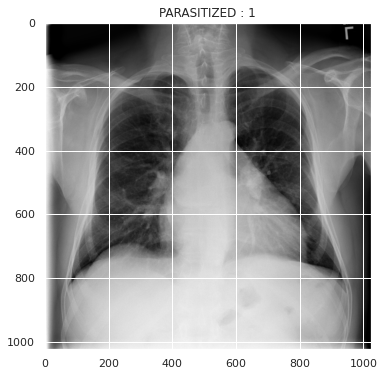

1024 1024 3


In [20]:
#visualize one image
import cv2
plt.figure(figsize = (6,6))

img = cv2.imread('images_001/images/00000001_000.png')
plt.imshow(img)
plt.title('PARASITIZED : 1')
plt.show()

height, width,channels = img.shape[:3]
print(height, width,channels)

# Step 2


In this project, we built a CNN network as our model. Train, test and visualize the classification results.

## 2.1 Seperate train set and test set

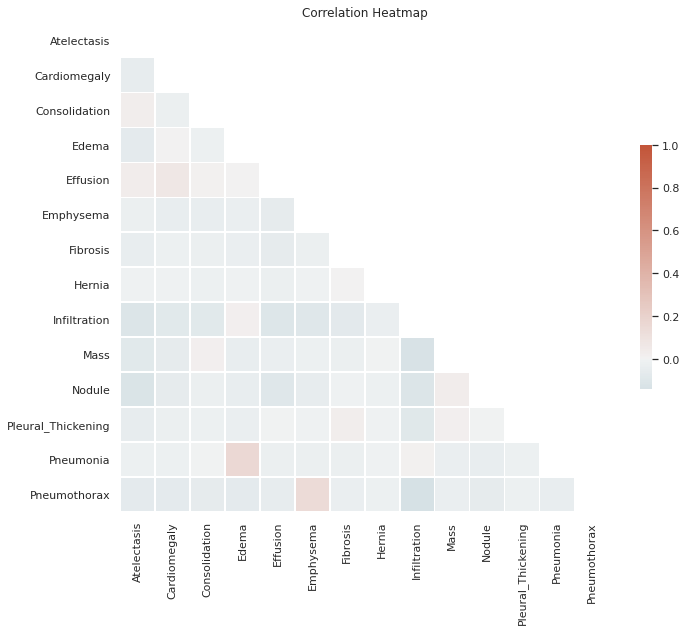

In [21]:
correlation_df = image_label_map.drop({'Patient ID'}, axis = 1)

sns.set(style = "white")
# Compute the correlation matrix
# ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr  = correlation_df.corr()

# Generate a mask for the upper triangle
mask  = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap  = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

# images file path
#IMAGE_DIR='images_001/images'
#IMAGE_DIR='images_001/images'

# split data into train set and test set
x_train, x_test= train_test_split(image_label_map , test_size = 0.2, random_state = 101)

In [23]:
x_train

Index  Patient ID  Atelectasis  Cardiomegaly  Consolidation  \
15874  00009925_043.png        9925            0             0              0   
26006  00014710_005.png       14710            1             0              0   
46725  00027066_005.png       27066            0             0              0   
30245  00016896_008.png       16896            0             0              0   
50113  00029479_005.png       29479            0             0              0   
...                 ...         ...          ...           ...            ...   
5695   00003527_001.png        3527            0             0              0   
8006   00005094_009.png        5094            0             0              1   
17745  00010801_000.png       10801            0             0              0   
17931  00010866_003.png       10866            0             0              0   
45919  00026554_005.png       26554            0             0              0   

       Edema  Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  \
15874      0         0          0         0       0             0     0   
26006      0         0          0         0       0             0     0   
46725      0         0          0         0       0             0     0   
30245      0         0          0         0       0             0     0   
50113      0         0          0         0       0             1     0   
...      ...       ...        ...       ...     ...           ...   ...   
5695       0         0          0         0       0             0     0   
8006       0         0          0         0       0             0     0   
17745      0         0          0         0       0             0     0   
17931      0         0          0         0       0             0     1   
45919      0         1          0         0       0             0     0   

       Nodule  Pleural_Thickening  Pneumonia  Pneumothorax  
15874       0                   0          0             1  
26006       1                   0          1             0  
46725       1                   0          0             1  
30245       1                   0          0             0  
50113       0                   0          0             0  
...       ...                 ...        ...           ...  
5695        0                   0          0             1  
8006        0                   0          0             0  
17745       1                   0          0             0  
17931       0                   0          0             0  
45919       0                   0          0             0  

[41407 rows x 16 columns]

In [24]:
x_test

Index  Patient ID  Atelectasis  Cardiomegaly  Consolidation  \
48502  00028341_013.png       28341            0             0              0   
42760  00023093_011.png       23093            0             1              0   
39784  00021420_011.png       21420            0             0              1   
11739  00007332_001.png        7332            0             0              0   
12934  00008051_036.png        8051            1             0              1   
...                 ...         ...          ...           ...            ...   
50698  00029882_000.png       29882            1             1              0   
16077  00010007_067.png       10007            0             0              0   
33354  00018355_002.png       18355            1             0              0   
26945  00015192_001.png       15192            0             0              0   
32654  00018046_001.png       18046            0             0              0   

       Edema  Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  \
48502      0         1          0         0       0             1     0   
42760      0         0          0         0       0             0     0   
39784      0         1          0         0       0             0     0   
11739      1         0          0         0       0             0     0   
12934      0         0          0         0       0             0     0   
...      ...       ...        ...       ...     ...           ...   ...   
50698      0         1          0         0       0             1     0   
16077      0         0          0         0       0             0     0   
33354      0         0          0         0       0             0     0   
26945      0         0          0         0       0             1     0   
32654      0         0          0         0       0             1     0   

       Nodule  Pleural_Thickening  Pneumonia  Pneumothorax  
48502       0                   0          0             0  
42760       0                   0          0             0  
39784       0                   0          0             0  
11739       0                   0          0             0  
12934       0                   0          0             0  
...       ...                 ...        ...           ...  
50698       0                   0          0             0  
16077       0                   1          0             0  
33354       0                   0          0             0  
26945       0                   0          0             0  
32654       0                   0          0             0  

[10352 rows x 16 columns]

In [25]:
from keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE=[512, 512]# original :1024
EPOCHS = 30
# BATCH_SIZE = 8 * strategy.num_replicas_in_sync
BATCH_SIZE = 64  

def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 512, target_h = 512):#320

  print("\n getting train generator...")
   
  image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True, 
         # data augmentation:
        shear_range=0.1,
        zoom_range=0.15,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.05,
        horizontal_flip=True, 
        vertical_flip = False, 
        fill_mode = 'reflect')
  generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
  return generator



def get_test_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):

  print("\n getting test generator...")
   
  image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True, 
        )
  generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
    
  return generator




In [26]:
#IMAGE_DIR='images_001/images'
train_generator = get_train_generator(df = x_train,#image_label_map,
                                      image_dir = IMAGE_DIR, # original:None
                                      x_col = "Index",#FilePath
                                      y_cols = labels, 
                                      batch_size=BATCH_SIZE,
                                      target_w = IMAGE_SIZE[0], 
                                      target_h = IMAGE_SIZE[1] 
                                      )


test_generator = get_test_generator(df = x_test,# original:image_label_map,
                                      image_dir = IMAGE_DIR, # original:None
                                      x_col = 'Index',
                                      y_cols = labels, 
                                      batch_size=BATCH_SIZE,
                                      target_w = IMAGE_SIZE[0], 
                                      target_h = IMAGE_SIZE[1] 
                                      )


 getting train generator...
Found 1794 validated image filenames.

 getting test generator...
Found 451 validated image filenames.


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 39613 invalid image filename(s) in x_col="Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 9901 invalid image filename(s) in x_col="Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)


To test the usability of generator, here we visualize a batch(16) of images and all their corresponding labels in below cells.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

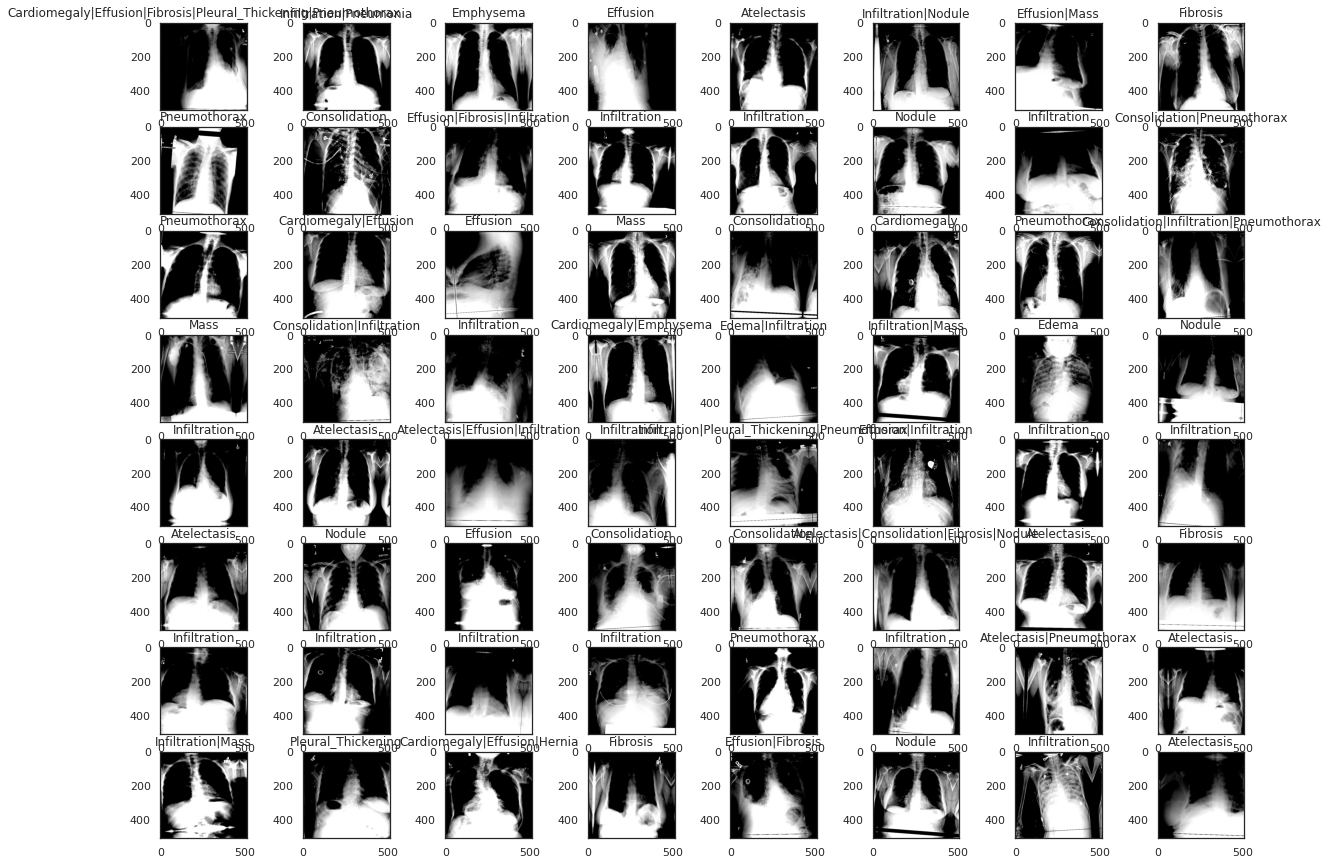

In [27]:
####do not run this cell

X, Y = next(train_generator)
#X, Y = train_generator.next()

def get_label(y):
    ret_labels = []
    for idx in range(len(y)):
        if y[idx]: ret_labels.append(labels[idx])
    if len(ret_labels):  return '|'.join(ret_labels)
    else: return 'No Label'

'''
x, y = train_generator.__getitem__(0)
plt.figure() 
plt.title("The first image by training generator") # i add
plt.imshow(x[0]) 

'''
rows = int(np.floor(np.sqrt(X.shape[0])))
# print(X.shape)
cols = int(X.shape[0]//rows)
fig = plt.figure(figsize=(20,15))
for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    plt.imshow(X[i-1], cmap='gray')
    plt.title(get_label(Y[i-1]))
    plt.axis(True)
    fig.add_subplot

## 2.3 Build Model

Here we gonna use Keras to build and train the matchine learning model.

In [28]:
import tensorflow 
from tensorflow import keras 
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

### 2.3.1 CNN Model Build 

(parameter reason)

In [29]:
#for 512*512 image
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
        #defalt: stride=1, padding=0"same"
    model.add(Conv2D(16, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

# 30*30*64


    model.add(Flatten())
    
    model.add(Dense(128, activation = 'relu'))#512
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))

    model.add(Dense(classes, activation = 'sigmoid'))
    
    return model

In [30]:
# original for 1024 decision, do not run!
"""
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
        #defalt: stride=1, padding=0"same"
    model.add(Conv2D(16, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

# 30*30*64


    model.add(Flatten())
    
    model.add(Dense(128, activation = 'relu'))#512
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))

    model.add(Dense(classes, activation = 'softmax'))#############!
    
    return model
    """

'\ndef CNNbuild(height, width, classes, channels):\n    model = Sequential()\n    \n    inputShape = (height, width, channels)\n    chanDim = -1\n    \n    if K.image_data_format() == \'channels_first\':\n        inputShape = (channels, height, width)\n        #defalt: stride=1, padding=0"same"\n    model.add(Conv2D(16, (3,3), activation = \'relu\', input_shape = inputShape))\n    model.add(MaxPooling2D(2,2))\n    model.add(BatchNormalization(axis = chanDim))\n    model.add(Dropout(0.2))\n\n    model.add(Conv2D(32, (3,3), activation = \'relu\'))\n    model.add(MaxPooling2D(2,2))\n    model.add(BatchNormalization(axis = chanDim))\n    model.add(Dropout(0.2))\n\n    model.add(Conv2D(32, (3,3), activation = \'relu\'))\n    model.add(MaxPooling2D(2,2))\n    model.add(BatchNormalization(axis = chanDim))\n    model.add(Dropout(0.2))\n\n    model.add(Conv2D(64, (3,3), activation = \'relu\'))\n    model.add(MaxPooling2D(2,2))\n    model.add(BatchNormalization(axis = chanDim))\n    model.add(Dr

Using `CNNbuild` function to build CNN model, and print the model summary for the fully connected network.

In [31]:
height = 512
width = 512
classes = 14
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 255, 255, 16)      64        
_________________________________________________________________
dropout (Dropout)            (None, 255, 255, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      1

In [32]:
#optimizer = keras.optimizers.Adam(lr=0.01)

In [33]:
train_generator.labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
from keras import backend as K
def compute_class_freqs(labels):
    positive_frequencies = np.sum(labels, axis=0) / labels.shape[0]
    negative_frequencies = 1 - positive_frequencies
    return positive_frequencies, negative_frequencies
freq_pos, freq_neg = compute_class_freqs(train_generator.labels)

pos_weights = freq_neg
neg_weights = freq_pos
#pos_contribution = freq_pos * pos_weights
#neg_contribution = freq_neg * neg_weights

print(pos_weights)




[0.803233   0.91694537 0.91137124 0.95652174 0.7787068  0.94481605
 0.9264214  0.98662207 0.63489409 0.92753623 0.90635452 0.92363434
 0.96822742 0.91248606]


In [35]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
 
  def weighted_loss(y_true, y_pred):
      loss = 0.0
      for i in range(len(pos_weights)):
      # for each class, add average weighted loss for that class
        loss += -(K.mean(pos_weights[i] * y_true[:, i] * K.log(y_pred[:, i] + epsilon) + \
              neg_weights[i] * (1 - y_true[:, i]) * K.log(1 - y_pred[:, i] + epsilon), axis=0))
      return loss
  return weighted_loss
weighted_loss=get_weighted_loss(pos_weights, neg_weights)  #function

In [36]:

model.compile(loss = "binary_crossentropy" ,optimizer = 'Adam', 
              metrics = [keras.metrics.BinaryAccuracy(),'AUC'])
##loss = 'mean_squared_error', 'categorical_crossentropy'  "binary_crossentropy""sparse_categorical_crossentropy"
#   'Adam' 'accuracy 

In [37]:

h = model.fit(train_generator, 
                    #validation_data=valid_generator,
                     #callbacks=callbacks, # early stop and save model
                      steps_per_epoch=28,#25 how many samples for each epoch= number of gradient descent
                      #validation_steps=2, 
                      epochs=15) #15
#(# 𝑠𝑡𝑒𝑝𝑠 𝑝𝑒𝑟 𝑒𝑝𝑜𝑐ℎ ) × 𝑏𝑎𝑡𝑐ℎ 𝑠𝑖𝑧𝑒 = # 𝑡𝑜𝑡𝑜𝑙 𝑡𝑟𝑎𝑖𝑛𝑖𝑛𝑔 𝑠𝑎𝑚𝑝𝑙𝑒s 1794

Epoch 1/15
28/28 [==============================] - 134s 5s/step - loss: 0.9064 - binary_accuracy: 0.5315 - auc: 0.5253
Epoch 2/15
28/28 [==============================] - 135s 5s/step - loss: 0.7809 - binary_accuracy: 0.5633 - auc: 0.5362
Epoch 3/15
28/28 [==============================] - 135s 5s/step - loss: 0.7110 - binary_accuracy: 0.6095 - auc: 0.5499
Epoch 4/15
28/28 [==============================] - 135s 5s/step - loss: 0.6365 - binary_accuracy: 0.6686 - auc: 0.5596
Epoch 5/15
28/28 [==============================] - 135s 5s/step - loss: 0.5643 - binary_accuracy: 0.7346 - auc: 0.5863
Epoch 6/15
28/28 [==============================] - 136s 5s/step - loss: 0.4939 - binary_accuracy: 0.7903 - auc: 0.5929
Epoch 7/15
28/28 [==============================] - 135s 5s/step - loss: 0.4406 - binary_accuracy: 0.8319 - auc: 0.6140
Epoch 8/15
28/28 [==============================] - 135s 5s/step - loss: 0.3914 - binary_accuracy: 0.8584 - auc: 0.6449
Epoch 9/15
28/28 [======================

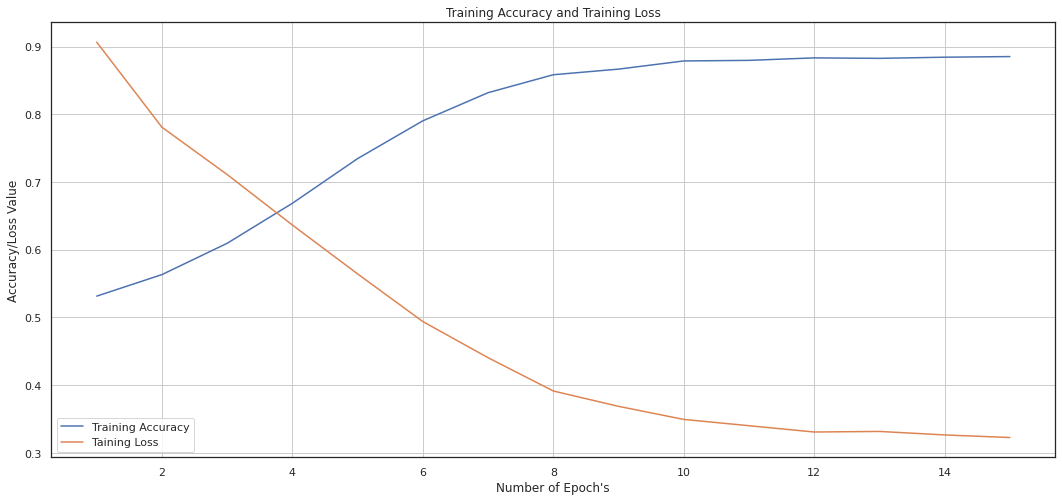

In [38]:
plt.figure(figsize = (18,8))
plt.plot(range(1,len(h.history['binary_accuracy'])+1), h.history['binary_accuracy'], label = 'Training Accuracy')
plt.plot(range(1,len(h.history['loss'])+1), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")
plt.grid(True)

In [39]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

8/8 [==============================] - 15s 2s/step - loss: 0.3102 - binary_accuracy: 0.8885 - auc: 0.7571
Test Accuracy: 88.85%
29/29 [==============================] - 139s 5s/step - loss: 0.3114 - binary_accuracy: 0.8913 - auc: 0.7379
Train Accuracy: 89.13%


In [40]:
predicted_vals = model.predict(test_generator, steps = len(test_generator))


In [41]:
#find best threshold
from sklearn.metrics import matthews_corrcoef
threshold = np.arange(0.1,0.9,0.1)
out=predicted_vals
y_test=test_generator.labels
acc = []
accuracies = []
best_threshold = np.zeros(out.shape[1])
for i in range(out.shape[1]):
    y_prob = np.array(out[:,i])
    for j in threshold:
        y_pred = [1 if prob>=j else 0 for prob in y_prob]
        acc.append( matthews_corrcoef(y_test[:,i],y_pred))
    acc   = np.array(acc)
    index = np.where(acc==acc.max()) 
    accuracies.append(acc.max()) 
    best_threshold[i] = threshold[index[0][0]]
    acc = []


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-pa

In [42]:
y_pred = np.array([[1 if out[i,j]>=best_threshold[j] else 0 for j in range(y_test.shape[1])] for i in range(len(y_test))])

In [43]:
y_pred[:2]

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [44]:
y_test[:2]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

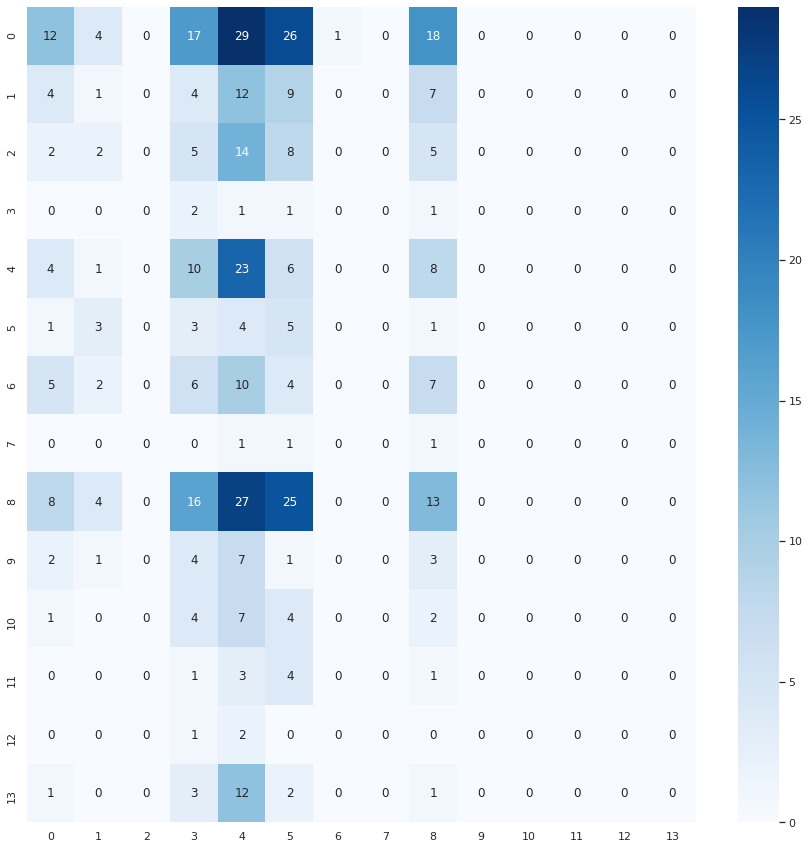

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
pd.DataFrame(classification_report(y_test,y_pred, output_dict=True))
sns.set(rc = {'figure.figsize':(15,15)})
confusion_matrix_df = pd.DataFrame(matrix)
sns.heatmap(confusion_matrix_df, annot=True,cmap="Blues")

In [46]:
#test loss
from sklearn.metrics import hamming_loss
hamming_loss(y_test,y_pred)

0.1759581881533101

## 2.4 Use pretrained network

In [47]:
from keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import VGG16
from keras import backend as K
from keras.models import Sequential, Model
 

In [51]:
#transfer learning 
base_model = DenseNet121(include_top=False) # or VGG16
layers = base_model.layers
print(f"The model has {len(layers)} layers")
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")
#base_model.summary()


x = base_model.output #16*16*1024, output of base model
x = GlobalAveragePooling2D()(x) # pass through pooling layser,
predictions = Dense(len(labels), activation="sigmoid")(x) #pass through fc layer, get final output

new_model = Model(inputs=base_model.input, outputs=predictions)
new_model.compile(optimizer='adam', loss= "binary_crossentropy",
                  metrics=[keras.metrics.BinaryAccuracy(),'AUC'])



The model has 427 layers
The input shape Tensor("input_3:0", shape=(None, None, None, 3), dtype=float32)
The output shape Tensor("relu/Relu_2:0", shape=(None, None, None, 1024), dtype=float32)


In [52]:
hh = new_model.fit(train_generator, 
                      steps_per_epoch=18, 
                      epochs=2) #15
#converge obviously faster 

Epoch 1/2


ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted:  OOM when allocating tensor with shape[64,128,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node functional_5/conv2_block4_1_conv/Conv2D (defined at <ipython-input-52-8e4f8832e8ff>:3) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[assert_greater_equal/Assert/AssertGuard/pivot_f/_3/_25]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

  (1) Resource exhausted:  OOM when allocating tensor with shape[64,128,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node functional_5/conv2_block4_1_conv/Conv2D (defined at <ipython-input-52-8e4f8832e8ff>:3) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_74989]

Function call stack:
train_function -> train_function


In [37]:
plt.figure(figsize = (18,8))
plt.plot(range(1,len(hh.history['binary_accuracy'])+1), hh.history['binary_accuracy'], label = 'Training Accuracy')
plt.plot(range(1,len(hh.history['loss'])+1), hh.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss using VGG16')
plt.legend(loc = "best")
plt.grid(True)


# Step 3


# 3.1 Comparsion between healthy and ill people

In [53]:
import bokeh
import IPython.display as ipd
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.models.tools import HoverTool
from bokeh.palettes import BuGn4, cividis
from bokeh.plotting import figure, output_notebook, show, output_file
from bokeh.transform import cumsum
from bokeh.palettes import Category20b



In [55]:
import bokeh
import IPython.display as ipd
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.models.tools import HoverTool
from bokeh.palettes import BuGn4, cividis
from bokeh.plotting import figure, output_notebook, show, output_file
from bokeh.transform import cumsum
from bokeh.palettes import Category20c

output_notebook()
diagnosis = ['Health', 'ill' ]
counts = [(train_df['Finding Labels'] == 'No Finding').sum(), train_df.shape[0]- (train_df['Finding Labels'] == 'No Finding').sum()]
source = ColumnDataSource(pd.DataFrame({'Type':diagnosis,'Counts':counts, 'color':['#deebf7', '#084594']}))


tooltips = [
    ("Category", "@Type"),
    ("No of Samples", "@Counts")
]

normal_vs_sick = figure(x_range=diagnosis, y_range=(0,70000), plot_height=500, plot_width = 500, title="health vs illness Distribution", tooltips = tooltips)
normal_vs_sick.vbar(x='Type', top='Counts', width=1, legend_field="Type", color = 'color', source=source)
normal_vs_sick.xgrid.grid_line_color = 'blue'
normal_vs_sick.legend.orientation = "vertical"
normal_vs_sick.legend.location = "top_right"
show(normal_vs_sick)





Loading BokehJS ...

In [56]:
all_labels_df = all_labels_df.explode('Finding Labels')

groups = all_labels_df.groupby('Finding Labels')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
def outliers(group):
    cat = group.name
    return group[(group["Patient ID"] > upper.loc[cat]['Patient ID']) | (group["Patient ID"] < lower.loc[cat]['Patient ID'])]['Patient ID']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = list(out.index.get_level_values(0))
    outy = list(out.values)

p = figure(tools="", background_fill_color="#efefef", x_range=list(mlb.classes_), toolbar_location=None,plot_height=400, plot_width = 1200,title="Diagnosis distrbution on Patient ID")

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper['Patient ID'] = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'Patient ID']),upper['Patient ID'])]
lower['Patient ID'] = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'Patient ID']),lower['Patient ID'])]

# stems
p.segment(list(mlb.classes_), upper['Patient ID'], list(mlb.classes_), q3['Patient ID'], line_color="black")
p.segment(list(mlb.classes_), lower['Patient ID'], list(mlb.classes_), q1['Patient ID'], line_color="black")

# boxes
p.vbar(list(mlb.classes_), 0.7, q2['Patient ID'], q3['Patient ID'], fill_color="#E08E79", line_color="black")
p.vbar(list(mlb.classes_), 0.7, q1['Patient ID'], q2['Patient ID'], fill_color="#3B8686", line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p.rect(list(mlb.classes_), lower['Patient ID'], 0.2, 0.01, line_color="black")
p.rect(list(mlb.classes_), upper['Patient ID'], 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p.circle(outx, outy, size=10, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="12px"

show(p)


In [57]:
def plot_pie_bokeh(data = None):
    from math import pi
    from bokeh.palettes import Category20c
    x = data.to_dict()

    data = pd.Series(x).reset_index(name='value').rename(columns={'index':'category'})
    data['angle'] = data['value']/data['value'].sum() * 2*pi
    data['color'] = Category20c[len(x)]
    p = figure(plot_height=400, plot_width = 700, title="Pie Chart", tooltips="@category: @value%", x_range=(-0.5, 1.0))
    p.wedge(x=0.38, y=1, radius=0.4, start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
            line_color="black", fill_color='color', legend_field='category', source=data)
    p.axis.axis_label=None
    p.axis.visible=False
    p.grid.grid_line_color = None

    p.legend.orientation = "vertical"
    p.legend.location = "top_left"
    
    return p
    

data = image_label_map[labels].sum(axis=0).sort_values(ascending = True)

# bokeh packages

diagnosis = data.index.tolist()
source = ColumnDataSource(data=dict(diagnosis=data.index.tolist(), counts=data.tolist(), color = Category20c[len(data)]))

tooltips = [("Diagnosis", "@diagnosis"), ("Count", "@counts") ]
diag_dist = figure(x_range=diagnosis, y_range=(0,25000), plot_height=400, plot_width = 1200, title="Diagnosis Distributions", tooltips = tooltips)
diag_dist.vbar(x='diagnosis', top='counts', width=0.65, color='color', legend_field="diagnosis", source=source)

diag_dist.xgrid.grid_line_color = '#444444'
diag_dist.legend.orientation = "horizontal"
diag_dist.legend.location = "top_left"


dist_diag_percent = plot_pie_bokeh(data/data.sum()*100)

show(column(diag_dist, dist_diag_percent))





In [58]:
data = image_label_map[labels].sum(axis=0).sort_values(ascending = True)

# bokeh packages

diagnosis = data.index.tolist()
source = ColumnDataSource(data=dict(diagnosis=data.index.tolist(), counts=data.tolist(), color = Category20b[len(data)]))

tooltips = [("Diagnosis", "@diagnosis"), ("Count", "@counts") ]
diag_dist = figure(x_range=diagnosis, y_range=(0,100), plot_height=400, plot_width = 700, title="Diagnosis Distributions", tooltips = tooltips)
diag_dist.vbar(x='diagnosis', top='counts', width=0.65, color='color', legend_field="diagnosis", source=source)

diag_dist.xgrid.grid_line_color = None
diag_dist.legend.orientation = "vertical"
diag_dist.legend.location = "top_left"




def plot_pie_bokeh(data = None):
    from math import pi
    from bokeh.palettes import Category20c
    x = data.to_dict()

    data = pd.Series(x).reset_index(name='value').rename(columns={'index':'category'})
    data['angle'] = data['value']/data['value'].sum() * 2*pi
    data['color'] = Category20b[len(x)]
    p = figure(plot_height=400, plot_width = 700, title="Pie Chart", tooltips="@category: @value%", x_range=(-0.5, 1.0))
    p.wedge(x=0.38, y=1, radius=0.4, start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
            line_color="black", fill_color='color', legend_field='category', source=data)
    

    p.axis.axis_label=None
    p.axis.visible=False
    p.grid.grid_line_color = None

    p.legend.orientation = "vertical"
    p.legend.location = "top_left"
    
    return p


dist_diag_percent = plot_pie_bokeh(data/data.sum()*100)

show(column(diag_dist, dist_diag_percent))





show(plot_pie_bokeh(data/data.sum()*100))




In [59]:
train_df.rename(columns={"Patient Age": "PatientAge"}, inplace = True)
train_df[train_df['PatientAge'] > 100]


average_age = int(train_df[train_df['PatientAge'] < 100]['PatientAge'].mean())
for idx in range(train_df.shape[0]):
    if train_df.iloc[idx, 4] > 100:
        print(f'{train_df.iloc[idx, 0]} : age {train_df.iloc[idx, 4]} is changed to ->> {average_age}')
        train_df.iloc[idx, 4] = average_age

train_df[train_df['PatientAge'] > 80]# 100


Index Finding Labels  Follow-up #  Patient ID  PatientAge  \
11      00000003_000.png         Hernia            7           3          81   
12      00000004_000.png    Mass|Nodule            0           4          82   
21      00000006_000.png     No Finding            0           6          81   
22      00000007_000.png     No Finding            0           7          82   
27      00000010_000.png   Infiltration            0          10          84   
...                  ...            ...          ...         ...         ...   
111613  00030561_017.png       Effusion           17       30561          82   
111614  00030561_018.png       Effusion           18       30561          82   
111615  00030561_019.png     No Finding           19       30561          82   
111616  00030561_020.png     No Finding           20       30561          82   
111617  00030561_021.png     No Finding           21       30561          82   

       Patient Gender View Position  OriginalImage[Width  Height]  \
11                  F            PA                 2582     2991   
12                  M            AP                 2500     2048   
21                  M            PA                 2500     2048   
22                  M            PA                 2500     2048   
27                  F            PA                 2992     2991   
...               ...           ...                  ...      ...   
111613              F            PA                 2021     2021   
111614              F            PA                 2021     2021   
111615              F            PA                 1798     1769   
111616              F            PA                 2021     2021   
111617              F            PA                 1865     1960   

        OriginalImagePixelSpacing[x        y]  
11                         0.143000  0.143000  
12                         0.168000  0.168000  
21                         0.168000  0.168000  
22                         0.168000  0.168000  
27                         0.143000  0.143000  
...                             ...       ...  
111613                     0.194311  0.194311  
111614                     0.194311  0.194311  
111615                     0.194311  0.194311  
111616                     0.194311  0.194311  
111617                     0.194311  0.194311  

[825 rows x 11 columns]

In [60]:
def hist_hover(data, column=None,  title = 'Histogram',  colors=["SteelBlue", "Tan"], bins=30, log_scale=False, show_plot=True):

    # build histogram data with Numpy
    hist, edges = np.histogram(data, bins = bins)

    hist_df = pd.DataFrame({column: hist, "left": edges[:-1], "right": edges[1:]})
    hist_df["interval"] = ["%d to %d" % (left, right) for left, 
                           right in zip(hist_df["left"], hist_df["right"])]


                           # bokeh histogram with hover tool
    if log_scale == True:
        hist_df["log"] = np.log(hist_df[column])
        src = ColumnDataSource(hist_df)
        plot = figure(plot_height = 300, plot_width = 600,
              title = title,
              x_axis_label = column.capitalize(),
              y_axis_label = "Log Count")    
        plot.quad(bottom = 0, top = "log",left = "left", 
            right = "right", source = src, fill_color = colors[0], 
            line_color = "black", fill_alpha = 0.7,
            hover_fill_alpha = 1.0, hover_fill_color = colors[1])
    else:
        src = ColumnDataSource(hist_df)
        plot = figure(plot_height = 300, plot_width = 600,
            title = title,
              x_axis_label = column.capitalize(),
              y_axis_label = "Count")    
        plot.quad(bottom = 0, top = column,left = "left", 
            right = "right", source = src, fill_color = colors[0], 
            line_color = "black", fill_alpha = 0.7,
            hover_fill_alpha = 1.0, hover_fill_color = colors[1])
        
    hover = HoverTool(tooltips = [(' Age Interval', '@interval'),
                              ('Sample Count', str("@" +str(column)))])
    plot.add_tools(hover)
    # output
    if show_plot == True:
        show(plot)
    else:
        return plot

In [61]:
hist_hover(train_df['PatientAge'], column = 'PatientAge', bins = 100)

In [62]:
train_df[train_df['PatientAge'] > 80 ]

Index Finding Labels  Follow-up #  Patient ID  PatientAge  \
11      00000003_000.png         Hernia            7           3          81   
12      00000004_000.png    Mass|Nodule            0           4          82   
21      00000006_000.png     No Finding            0           6          81   
22      00000007_000.png     No Finding            0           7          82   
27      00000010_000.png   Infiltration            0          10          84   
...                  ...            ...          ...         ...         ...   
111613  00030561_017.png       Effusion           17       30561          82   
111614  00030561_018.png       Effusion           18       30561          82   
111615  00030561_019.png     No Finding           19       30561          82   
111616  00030561_020.png     No Finding           20       30561          82   
111617  00030561_021.png     No Finding           21       30561          82   

       Patient Gender View Position  OriginalImage[Width  Height]  \
11                  F            PA                 2582     2991   
12                  M            AP                 2500     2048   
21                  M            PA                 2500     2048   
22                  M            PA                 2500     2048   
27                  F            PA                 2992     2991   
...               ...           ...                  ...      ...   
111613              F            PA                 2021     2021   
111614              F            PA                 2021     2021   
111615              F            PA                 1798     1769   
111616              F            PA                 2021     2021   
111617              F            PA                 1865     1960   

        OriginalImagePixelSpacing[x        y]  
11                         0.143000  0.143000  
12                         0.168000  0.168000  
21                         0.168000  0.168000  
22                         0.168000  0.168000  
27                         0.143000  0.143000  
...                             ...       ...  
111613                     0.194311  0.194311  
111614                     0.194311  0.194311  
111615                     0.194311  0.194311  
111616                     0.194311  0.194311  
111617                     0.194311  0.194311  

[825 rows x 11 columns]

In [63]:
ages_male = train_df.loc[(train_df["Patient Gender"] == 'M'), "PatientAge"].tolist()
ages_female = train_df.loc[(train_df["Patient Gender"] == 'F'), "PatientAge"].tolist()

In [64]:
show(column(hist_hover(ages_male, column = 'MaleAges', title = 'Male Patients Age Histogram', bins = 95, show_plot=False),
            hist_hover(ages_female, column = 'FemaleAges', title = 'Female Patients Age Histogram',  bins = 95, show_plot=False)))

In [65]:
train_df.PatientAge.max() - train_df.PatientAge.min()

95

In [66]:
bbox= pd.read_csv('/content/BBox_List_2017.csv')
bbox.rename(columns={"Bbox [x": "x","h]":"h"}, inplace = True)
def get_bbox_area(row):
    return (row['w'])*(row['h'])
bbox['bbox_area'] = bbox.apply(get_bbox_area, axis=1)
bbox.drop(columns = {"Unnamed: 6","Unnamed: 7","Unnamed: 8"},inplace = True)
bbox.replace("00013118_008.png", "00000001_000.png")




FileNotFoundError: [Errno 2] No such file or directory: '/content/BBox_List_2017.csv'

In [67]:
pip install pydicom

     |████████████████████████████████| 2.0 MB 22.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [68]:
sns.pairplot(bbox, hue='Finding Label');

NameError: name 'bbox' is not defined

In [ ]:
import pydicom
from glob import glob
from tqdm.notebook import tqdm
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
from skimage import exposure
import cv2
import pydicom.uid
import warnings
warnings.filterwarnings('ignore')
def dicom2array(path, voi_lut=True, fix_monochrome=True):
    dicom = pydicom.read_file(path,force = True)
    
    # VOI LUT (if available by DICOM device) is used to
    # transform raw DICOM data to "human-friendly" view
    if voi_lut:
        
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return data
def plot_imgs(imgs, cols=4, size=7, is_rgb=True, title="", cmap='gray', img_size=(500,500)):
    rows = len(imgs)//cols + 1
    fig = plt.figure(figsize=(cols*size, rows*size))
    for i, img in enumerate(imgs):
        if img_size is not None:
            img = cv2.resize(img, img_size)
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(img, cmap=cmap)
    plt.suptitle(title)
    plt.show()

import random
from random import randint
imgs = []
img_ids = bbox['Image Index'].values
class_ids = bbox['Finding Label'].unique()

# map label_id to specify color
label2color = {class_id:[randint(0,255) for i in range(3)] for class_id in class_ids}
thickness = 3
scale = 5



for i in range(8):
    img_id = random.choice(img_ids)
    img_path = f'/content/images_001/images/00000001_000.png'
    img = dicom2array(path=img_path)
    img = cv2.resize(img, None, fx=1/scale, fy=1/scale)
    img = np.stack([img, img, img], axis=-1)
    
    boxes = bbox.loc[bbox['image_id'] == img_id, ['x', 'y', 'w', 'h']].values/scale
    labels = bbox.loc[bbox['image_id'] == img_id, ['class_id']].values.squeeze()
    
    for label_id, box in zip(labels, boxes):
        color = label2color[label_id]
        img = cv2.rectangle(
            img,
            (int(box[0]), int(box[1])),
            (int(box[2]), int(box[3])),
            color, thickness
    )
    img = cv2.resize(img, (500,500))
    imgs.append(img)
    
plot_imgs(imgs, cmap=None)